In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from numpy import mean,std
import tensorflow as tf
from math import exp
from sklearn.model_selection import KFold
import os

In [2]:
#importing required nn libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
#importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#loading data
data = mnist.load_data()

In [5]:
type(data) #type of data

tuple

In [6]:
(trainX,trainY),(testX,testY) = data #distributing data in train and test 
type(trainX) #type of image in trainX

numpy.ndarray

In [7]:
#returing the unique count of each number from 0-9 in data
utrain,ctrain = np.unique(trainY,return_counts=True)
rtrain = list(zip(utrain,ctrain))
print("Train Labels: ", rtrain)

utest,ctest = np.unique(testY,return_counts=True)
rtest = list(zip(utest,ctest))
print("Train Labels: ", rtest)

Train Labels:  [(0, 5923), (1, 6742), (2, 5958), (3, 6131), (4, 5842), (5, 5421), (6, 5918), (7, 6265), (8, 5851), (9, 5949)]
Train Labels:  [(0, 980), (1, 1135), (2, 1032), (3, 1010), (4, 982), (5, 892), (6, 958), (7, 1028), (8, 974), (9, 1009)]


In [8]:
#shape of data 
print('Train dataset -> trainX:', trainX.shape, ' and trainY: ', trainY.shape)
print('Test dataset -> testX:', testX.shape, ' and testY: ', testY.shape)

Train dataset -> trainX: (60000, 28, 28)  and trainY:  (60000,)
Test dataset -> testX: (10000, 28, 28)  and testY:  (10000,)


(28, 28)


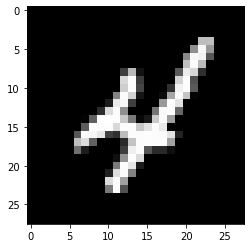

In [9]:
#ploting single image from train data set 
print(trainX[1].shape)
plt.imshow(trainX[9],cmap='gray')
plt.show()

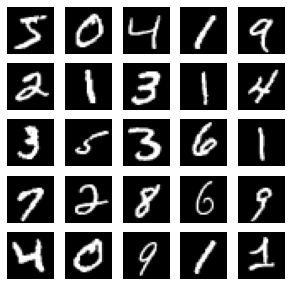

In [10]:
#plotting first 25 images of train data set
plt.figure(figsize = (5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(trainX[i],cmap = 'gray')
  plt.axis('off')
plt.show()

In [11]:
#load train and test dataset
def load_dataset():
  #load dataset
  (trainX,trainY),(testX,testY) = mnist.load_data()
  #one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX,trainY,testX,testY

In [12]:
num_labels = len(np.unique(trainY))
print(num_labels)
trainY = to_categorical(trainY)
testY = to_categorical(testY)

10


In [13]:
#Now we know each image size is 28*28 pixel
#print(trainX.shape[1]) #(28,28)
input_size = trainX.shape[1] * trainX.shape[1]
trainX = np.reshape(trainX, [-1, 784])
trainX = trainX.astype('float32')/255
testX = np.reshape(testX, [-1, 784])
testX = testX.astype('float32')/255


In [14]:
#scale pixels
def prep_pixels(train, test):
  
  train_norm = np.reshape(train, [-1, 784])
  test_norm = np.reshape(test, [-1, 784])
  #convert from integers to floats and normalize to range 0-1
  train_norm = train_norm.astype('float32')/255.0
  test_norm = test_norm.astype('float32')/255.0
  #return normalized images
  return train_norm,test_norm

In [15]:
batch_size = 128
hidden_units = 256
dropout = 0.45
epoch = 30

In [16]:
#decalring a expotenial decay 
def exp_decay(epoch):
  initial_lrate = 0.1
  k = 0.1
  lrate = initial_lrate * exp(-k*epoch)
  return lrate

In [17]:
#define cnn model
def define_model():
  #we are building 3 layer cnn model
  model = Sequential()
  model.add(Dense(hidden_units, input_dim = input_size))
  model.add(Activation('sigmoid'))
  model.add(Dropout(dropout))
  model.add(Dense(hidden_units))
  model.add(Activation('relu'))
  model.add(Dropout(dropout))
  model.add(Dense(num_labels))
  model.add(Activation('softmax'))
  #compile model
  opt = tf.keras.optimizers.Adam(learning_rate = exp_decay(epoch))
  model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

In [32]:
#define cnn model
def define_model_SGD():
  #we are building 3 layer cnn model
  model = Sequential()
  model.add(Dense(hidden_units, input_dim = input_size))
  model.add(Activation('relu'))
  model.add(Dropout(dropout))
  model.add(Dense(hidden_units))
  model.add(Activation('relu'))
  model.add(Dropout(dropout))
  model.add(Dense(num_labels))
  model.add(Activation('softmax'))
  #compile model
  opt = tf.keras.optimizers.SGD(learning_rate = exp_decay(epoch))
  model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

In [18]:
model_a = define_model()

In [19]:
model_a.summary()

# From input to dense layer = 784*256 + 256 = 200960
# from first dense to second dense = 26*256 + 256 = 65792
# from second dense to thirs dense = 10 * 256 + 10 = 2570
# total -> 200960 + 65792 + 2570 = 269322


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

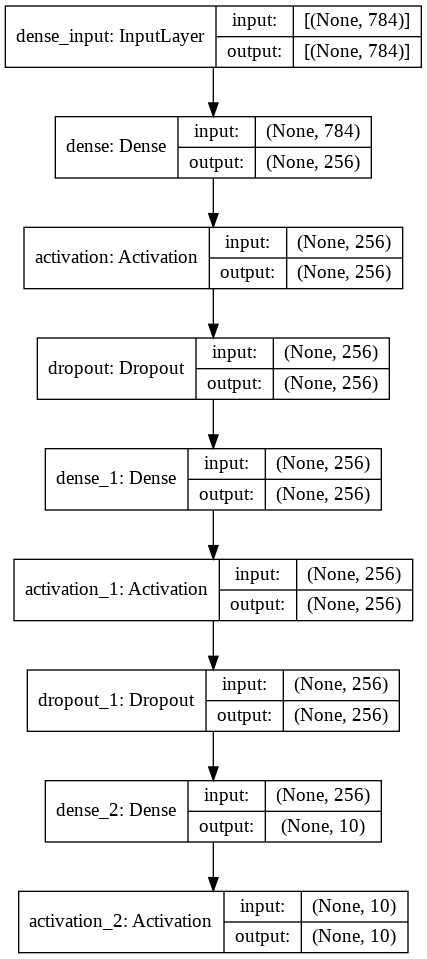

In [20]:
plot_model(model_a,show_shapes=True,show_layer_names=True)

In [21]:
#lr_rate = LearningRateScheduler(exp_decay(epoch))

In [22]:
#initial test block 
# initial_lr = 0.1
# lr_new = exp_decay(5)
# #lr = tf.keras.optimizers.schedules.ExponentialDecay(initial_lr, decay_steps = 10000, decay_rate = 0.95, staircase = True)
# opt = tf.keras.optimizers.Adam(learning_rate = lr_new)
# model_a.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [23]:
#history = model_a.fit(trainX,trainY,epochs=30, batch_size=batch_size)

In [24]:
# score = model_a.evaluate(testX, testY, batch_size = batch_size)
# print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

In [25]:
#early stoppping function
def custom_early():
  custom_early = EarlyStopping(monitor='val_loss',min_delta=0.001,patience=8,verbose=1,mode='auto',baseline=None,restore_best_weights=False,)
  return custom_early

In [35]:
#evaluate a model using kfold crossvalidation
def evaluate_model(dataX,dataY,n_folds = 5):
  scores,histories = list(),list()
  #prepare cross validation
  kfold = KFold(n_folds, shuffle = True, random_state = 1)
  #enumerate split
  for train_ix, test_ix in kfold.split(dataX):
    #define model
    model = define_model()
    #data split and select rows for train and test 
    trainX,trainY,testX,testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    #fir model
    history = model.fit(trainX,trainY,epochs=epoch, batch_size=batch_size, verbose = 1, validation_data = (testX,testY))
    #evaluate model
    _, acc = model.evaluate(testX,testY)
    print("\nTest accuracy: %.1f%%" % (100.0 * acc))
    print("\n")
    #stores scores
    scores.append(acc)
    histories.append(history)
  return scores,histories

In [36]:
def evaluate_model_SGD(dataX,dataY,n_folds = 5):
  scores,histories = list(),list()
  #prepare cross validation
  kfold = KFold(n_folds, shuffle = True, random_state = 1)
  #enumerate split
  for train_ix, test_ix in kfold.split(dataX):
    #define model
    model = define_model_SGD()
    #data split and select rows for train and test 
    trainX,trainY,testX,testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    #fir model
    history = model.fit(trainX,trainY,epochs=epoch, batch_size=batch_size, verbose = 1, validation_data = (testX,testY))
    #evaluate model
    _, acc = model.evaluate(testX,testY)
    print("\nTest accuracy: %.1f%%" % (100.0 * acc))
    print("\n")
    #stores scores
    scores.append(acc)
    histories.append(history)
  return scores,histories

In [27]:
#plot digonistic learning curve
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    #plot loss
    plt.subplot(2,1,1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'],'r',label = 'train')
    plt.plot(histories[i].history['val_loss'],'b',label = 'test')
    #plot accuracy
    plt.subplot(2,1,2)
    plt.title('Classification accuracy')
    plt.plot(histories[i].history['accuracy'],'r',label = 'train')
    plt.plot(histories[i].history['val_accuracy'],'b',label = 'test')
  
  #plt.legend([red,blue],['train','test'])
  plt.show()

In [28]:
#summarize model performance
def summarize_performance(scores):
  print('Accuracy: mean=%.3f std=%.3f n=%.3f' % (mean(scores)*100, std(scores)*100, len(scores)))
  plt.boxplot(scores)
  plt.show()

In [29]:
#Test output
trainX,trainY,testX,testY = load_dataset()
trainX,testX = prep_pixels(trainX,testX)
scores,histories = evaluate_model(trainX,trainY)
#evaluate_model_early(trainX,trainY,testX,testY)

Epoch 1/30
375/375 [==============================] - 4s 10ms/step - loss: 0.4666 - accuracy: 0.8546 - val_loss: 0.1886 - val_accuracy: 0.9407
Epoch 2/30
375/375 [==============================] - 3s 9ms/step - loss: 0.2171 - accuracy: 0.9364 - val_loss: 0.1257 - val_accuracy: 0.9611
Epoch 3/30
375/375 [==============================] - 3s 9ms/step - loss: 0.1713 - accuracy: 0.9495 - val_loss: 0.1084 - val_accuracy: 0.9663
Epoch 4/30
375/375 [==============================] - 3s 9ms/step - loss: 0.1504 - accuracy: 0.9541 - val_loss: 0.1062 - val_accuracy: 0.9672
Epoch 5/30
375/375 [==============================] - 3s 9ms/step - loss: 0.1341 - accuracy: 0.9594 - val_loss: 0.0976 - val_accuracy: 0.9717
Epoch 6/30
375/375 [==============================] - 3s 9ms/step - loss: 0.1295 - accuracy: 0.9611 - val_loss: 0.0931 - val_accuracy: 0.9720
Epoch 7/30
375/375 [==============================] - 4s 10ms/step - loss: 0.1187 - accuracy: 0.9647 - val_loss: 0.0890 - val_accuracy: 0.9721
Epoc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


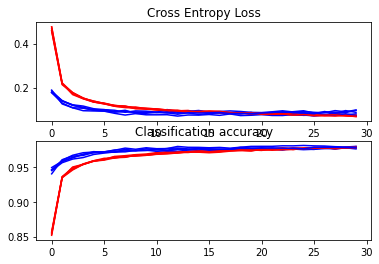

Accuracy: mean=97.840 std=0.118 n=5.000


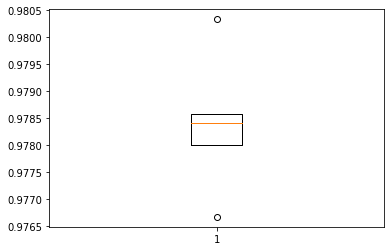

In [30]:
#output graph
summarize_diagnostics(histories)
summarize_performance(scores)

In [38]:
scores,histories = evaluate_model_SGD(trainX,trainY)

Epoch 1/30
375/375 [==============================] - 4s 9ms/step - loss: 2.0059 - accuracy: 0.3290 - val_loss: 1.4947 - val_accuracy: 0.7284
Epoch 2/30
375/375 [==============================] - 3s 9ms/step - loss: 1.3647 - accuracy: 0.5964 - val_loss: 0.8864 - val_accuracy: 0.8139
Epoch 3/30
375/375 [==============================] - 3s 9ms/step - loss: 1.0038 - accuracy: 0.6898 - val_loss: 0.6503 - val_accuracy: 0.8456
Epoch 4/30
375/375 [==============================] - 3s 9ms/step - loss: 0.8329 - accuracy: 0.7397 - val_loss: 0.5450 - val_accuracy: 0.8621
Epoch 5/30
375/375 [==============================] - 3s 9ms/step - loss: 0.7271 - accuracy: 0.7753 - val_loss: 0.4803 - val_accuracy: 0.8737
Epoch 6/30
375/375 [==============================] - 4s 10ms/step - loss: 0.6647 - accuracy: 0.7935 - val_loss: 0.4396 - val_accuracy: 0.8824
Epoch 7/30
375/375 [==============================] - 3s 9ms/step - loss: 0.6159 - accuracy: 0.8092 - val_loss: 0.4103 - val_accuracy: 0.8881
Epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


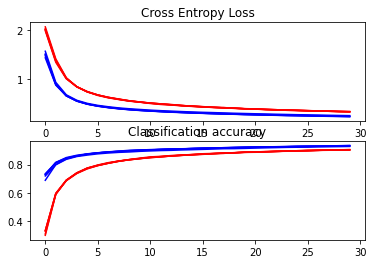

Accuracy: mean=93.222 std=0.238 n=5.000


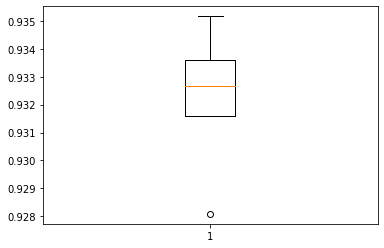

In [39]:
summarize_diagnostics(histories)
summarize_performance(scores)